A3a: Conduct a logistic regression analysis on your assigned dataset. Validate assumptions, evaluate with a confusion matrix and ROC curve, and interpret the results. Then, perform a decision tree analysis and compare it to the logistic regression.

Name : Aakash Kathirvel

VID : V01110153

Date : 07/01/2024

In [12]:
# Load necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [13]:
# Upload your dataset
uploaded = files.upload()


Saving kidney_disease.csv to kidney_disease.csv


In [14]:
# Load your dataset
df = pd.read_csv(next(iter(uploaded.keys())))

In [15]:
# Display the first few rows of the dataset
print(df.head())


   Unnamed: 0   age    bp     sg   al   su     rbc        pc         pcc  \
0           0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1           1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2           2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3           3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4           4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   

           ba  ...   pcv    wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  notpresent  ...  44.0  7800.0   5.2  yes  yes   no   good   no   no   ckd  
1  notpresent  ...  38.0  6000.0   NaN   no   no   no   good   no   no   ckd  
2  notpresent  ...  31.0  7500.0   NaN   no  yes   no   poor   no  yes   ckd  
3  notpresent  ...  32.0  6700.0   3.9  yes   no   no   poor  yes  yes   ckd  
4  notpresent  ...  35.0  7300.0   4.6   no   no   no   good   no   no   ckd  

[5 rows x 26 columns]


In [16]:
# Summary statistics of the dataset
print(df.describe())

       Unnamed: 0         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000   
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437   
std     79.281714   50.5030

In [17]:
# Check for missing values
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 1012


In [18]:
# Custom function to calculate mode
def mode_function(series):
    return series.mode()[0]

In [19]:
# Function to impute missing values
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(mode_function(df[col]), inplace=True)
    return df

In [20]:
# Impute missing values
df = impute_missing_values(df)


In [21]:
# Verify there are no more missing values
print("Total missing values after imputation:", df.isnull().sum().sum())

Total missing values after imputation: 0


In [22]:
# Ensure the target variable is a factor with exactly two levels
df['class'] = df['class'].astype('category')

In [23]:
# Convert target variable to numeric (1 for "ckd" and 0 for "notckd")
df['class'] = df['class'].apply(lambda x: 1 if x == "ckd" else 0)


In [25]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)

In [26]:
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('class', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['class'] = df['class']

In [27]:
# Split the data into training and testing sets
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [28]:
# Check the distribution of the target variable in training and testing sets
print("Training set distribution:\n", y_train.value_counts())
print("Testing set distribution:\n", y_test.value_counts())


Training set distribution:
 class
1    170
0    110
Name: count, dtype: int64
Testing set distribution:
 class
1    78
0    42
Name: count, dtype: int64


In [29]:
# Logistic Regression Model with Regularization
log_model = LogisticRegression(solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
cv_log_model = GridSearchCV(log_model, param_grid, cv=5, scoring='roc_auc')
cv_log_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [30]:
# Predict on the test set using the best model
log_pred = cv_log_model.predict_proba(X_test)[:, 1]
log_pred_class = cv_log_model.predict(X_test)

In [31]:
# Confusion Matrix for Logistic Regression
log_conf_matrix = confusion_matrix(y_test, log_pred_class)
print("Confusion Matrix for Logistic Regression:\n", log_conf_matrix)


Confusion Matrix for Logistic Regression:
 [[42  0]
 [ 0 78]]


In [32]:
# Interpretation of Confusion Matrix
tn, fp, fn, tp = log_conf_matrix.ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')


True Negatives: 42, False Positives: 0, False Negatives: 0, True Positives: 78


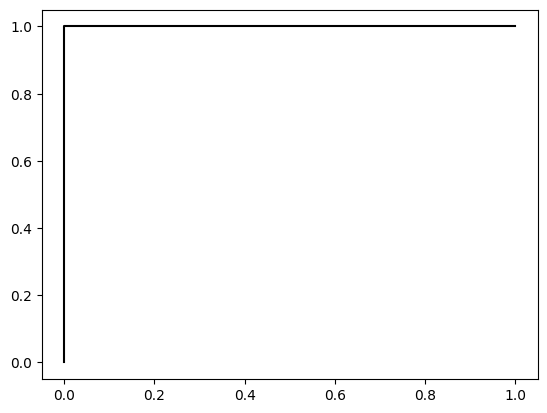

In [33]:
# ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, log_pred)
roc_auc_log = auc(fpr, tpr)
plt.plot(fpr, tpr, color='black', label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')


In [34]:
# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

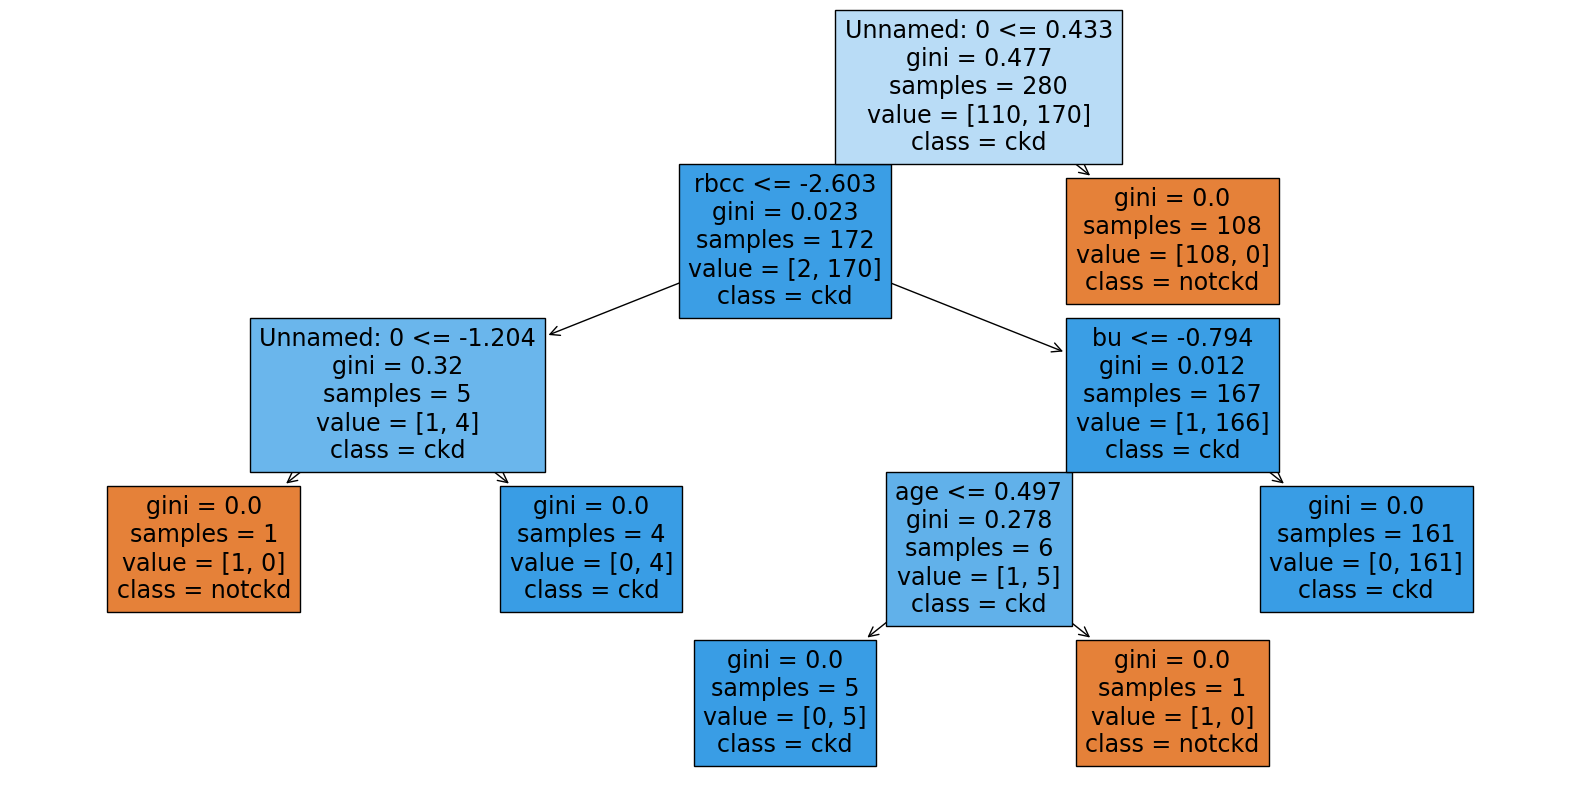

In [35]:
# Plot Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['notckd', 'ckd'])
plt.show()

In [36]:
# Predict on the test set using Decision Tree
tree_pred_prob = tree_model.predict_proba(X_test)[:, 1]
tree_pred_class = tree_model.predict(X_test)

In [37]:
# Confusion Matrix for Decision Tree
tree_conf_matrix = confusion_matrix(y_test, tree_pred_class)
print("Confusion Matrix for Decision Tree:\n", tree_conf_matrix)


Confusion Matrix for Decision Tree:
 [[42  0]
 [ 1 77]]


In [38]:
# Interpretation of Confusion Matrix
tn, fp, fn, tp = tree_conf_matrix.ravel()
print(f'True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}')

True Negatives: 42, False Positives: 0, False Negatives: 1, True Positives: 77


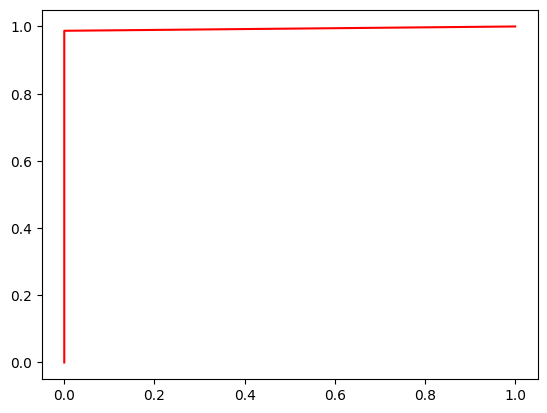

In [39]:
# ROC Curve for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_pred_prob)
roc_auc_tree = auc(fpr_tree, tpr_tree)
plt.plot(fpr_tree, tpr_tree, color='red', label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')


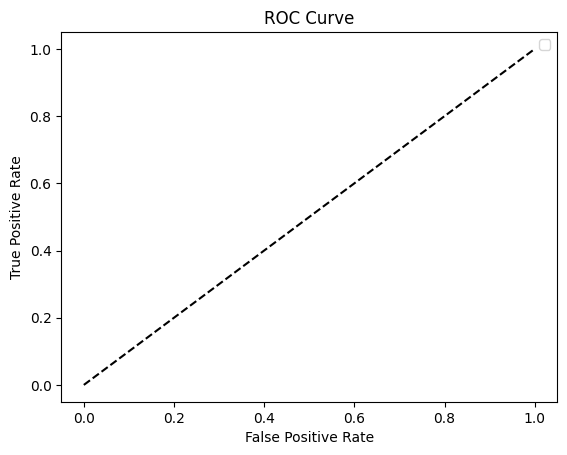

In [40]:
# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [41]:
# Compare Models
print("Logistic Regression vs Decision Tree")
print("AUC for Logistic Regression:", roc_auc_log)
print("AUC for Decision Tree:", roc_auc_tree)

Logistic Regression vs Decision Tree
AUC for Logistic Regression: 1.0
AUC for Decision Tree: 0.9935897435897436
